# Day 14: Variable Scope in Functions

### &#9989; Write your name here

You've used variables in Jupyter notebooks. These variables, once you define them, can be used anywhere in your file. This ability to use and alter these variables universally throughout your file is called **global** variable scope. 

There are a few different types of scope, meaning some variables cana only be used in a limited area of the code, or cannot be used at all. Here are the different types of scope you need to consider:
- **Built-in scope:** These variables are built into Python and cannot be altered at all. They are automatically usable in any Python notebook. When you type them in a code cell, they turn green and bold. Some examples are: `for`, `if`, and `True`.
- **Global scope:** These variables must be defined somewhere in the notebook. Once a global variable is defined, it is usable anywhere in the notebook (*except* if it was defined inside of a function). An example of a global variable is `x` after executing `x = 10`, or `np` after executing `import numpy as np`.
- **Local scope:** These variables are defined inside of a function, and they cannot be accessed outside of that function. For example, the variable `marker` has meaning inside the `plt.scatter` function, as you can see in the documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

To see how **local variable scope** works, see the code below, which demonstrates where `marker` can and can't be used. In the function call itself (inside of `plt.scatter`), `marker` has a well-defined meaning -- it is used to designate what data points look like on the plot. On the outside though (in the **global** environment), `marker` is undefined.

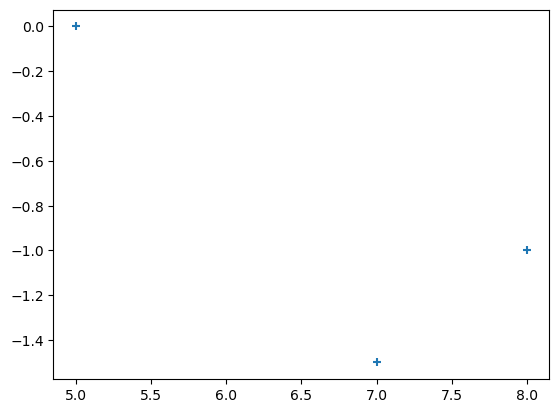

NameError: name 'marker' is not defined

In [1]:
import matplotlib.pyplot as plt

plt.scatter([7, 5, 8], [-1.5, 0, -1], marker="+")
plt.show()

print(marker)

In the code above, `marker` could not be accessed outside its usage in `plt.scatter`. In this sense, `marker` is **local** to the `plt.scatter` function. Some rules to consider when working with variables in and out of functions:
- When the computer reads a variable, it looks for the meaning of variable in the **same scope** where the variable is used.
- If the variable is not defined in the same scope, the computer then looks in **broader scopes**.

In the print statement that produced the error, the computer could not find a definition for `marker` in the same scope (the global scope). The only time `marker` was defined was in the local scope of the `plt.scatter` function, which was off limits to the rest of the code. 

In the visual below, each scope can access variables within itself and within the outer scopes. However, code in the global environment cannot access variables defined in local environments. The dashed line indicates the possibility for multiple layers of local environments, for example if a function is defined inside of another function.

<img src="https://raw.githubusercontent.com/pattihamerski/PH-36X-Public/01e2a7c919212ee28ea6b13619bbdfc2ebad74a6/image/variable-scope.png" alt="" width="600"/>

---

### Part 1: Reviewing functions that do repetitive tasks

Functions, at their core, are useful because they can store a frequently used chunk of code in one place. This reduces code clutter, saves space, and it's useful for a variety of situations where that chunk of code is needed. Consider the repetetive code below.

In [2]:
import numpy as np

a1 = 1
b1 = 0
c1 = -25

qf1_plus = (-b1 + np.sqrt(b1 ** 2 - 4 * a1 * c1)) / (2 * a1)  
qf1_minus = (-b1 - np.sqrt(b1 ** 2 - 4 * a1 * c1)) / (2 * a1)  

print("The intercepts of", a1, "x^2 +", b1, "x +", c1, "= 0 are", qf1_minus, "and", qf1_plus)

a2 = 1
b2 = -4
c2 = 0

qf2_plus = (-b2 + np.sqrt(b2 ** 2 - 4 * a2 * c2)) / (2 * a2)  
qf2_minus = (-b2 - np.sqrt(b2 ** 2 - 4 * a2 * c2)) / (2 * a2)  

print("The intercepts of", a2, "x^2 +", b2, "x +", c2, "= 0 are", qf2_minus, "and", qf2_plus)

a3 = 1
b3 = 5
c3 = 6

qf3_plus = (-b3 + np.sqrt(b3 ** 2 - 4 * a3 * c3)) / (2 * a3)  
qf3_minus = (-b3 - np.sqrt(b3 ** 2 - 4 * a3 * c3)) / (2 * a3)  

print("The intercepts of", a3, "x^2 +", b3, "x +", c3, "= 0 are", qf3_minus, "and", qf3_plus)

a4 = 1
b4 = -6
c4 = -7

qf4_plus = (-b4 + np.sqrt(b4 ** 2 - 4 * a4 * c4)) / (2 * a4)  
qf4_minus = (-b4 - np.sqrt(b4 ** 2 - 4 * a4 * c4)) / (2 * a4)  

print("The intercepts of", a4, "x^2 +", b4, "x +", c4, "= 0 are", qf4_minus, "and", qf4_plus)

The intercepts of 1 x^2 + 0 x + -25 = 0 are -5.0 and 5.0
The intercepts of 1 x^2 + -4 x + 0 = 0 are 0.0 and 4.0
The intercepts of 1 x^2 + 5 x + 6 = 0 are -3.0 and -2.0
The intercepts of 1 x^2 + -6 x + -7 = 0 are -1.0 and 7.0


The code chunk themselves compute solutions to the quadratic equation. It can be cleaned up significantly by storing the repetitive pieces in a function.
- The setup of variables can be translated into function inputs.
- The computation and the print statement can be translated into the body of the function definition.
- Each repetition can be translated into a function call.

In [3]:
# add comments to this cell

def quadratic(a, b, c): 
    qf_plus = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)  
    qf_minus = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)  
    print("The intercepts of", a, "x^2 +", b, "x +", c, "= 0 are", qf_minus, "and", qf_plus)

quadratic(1, 0, -25)
quadratic(1, -4, 0)
quadratic(1, 5, 6)
quadratic(1, -6, -7)

The intercepts of 1 x^2 + 0 x + -25 = 0 are -5.0 and 5.0
The intercepts of 1 x^2 + -4 x + 0 = 0 are 0.0 and 4.0
The intercepts of 1 x^2 + 5 x + 6 = 0 are -3.0 and -2.0
The intercepts of 1 x^2 + -6 x + -7 = 0 are -1.0 and 7.0


**&#9989; Task 1.1:** Add comments to the code cell above to describe how the function definition and the function calls work.

**&#9989; Task 1.2:** Describe the scope of different variables used in the code.
- List all variables in the code cell.
- For each variable, state whether it is local, global, or built-in. *Hint: there is at least one of each in the code cell.*



**/your answer here/**

#### &#128721; **Stop here and check your progress with an instructor**

---

### Part 2: Predicting behavior of functions and variables

To practice evaluating the scope of variables and the usage of functions, do the exercises below, all based on the given function `funky_func`.

In [ ]:
def funky_func(s, n, L, multiplier=1, color="tomato"):
    s_len = len(s)
    L_len = len(L)
    total = (s_len + n + L_len) * multiplier

    plt.bar(["String", "Number", "List"], [s_len, n, L_len], color=color)
    plt.ylabel("Size")
    plt.title("Funky Chart")
    plt.show()

    return total

**&#9989; Task 2.1:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
result = funky_func("hello", 14, [-6])
print(result)

**&#9989; Task 2.2:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
result = funky_func(s, n, L, multiplier=2)
print(result)

**&#9989; Task 2.3:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
result = funky_func("one", 2, [], multiplier=3)
print(multiplier)

**&#9989; Task 2.4:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
six = "five"
result = funky_func(six, -9, [0] * 3)
print(result)

**&#9989; Task 2.5:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
nine = "five six seven eight"
num = 103
funky_func(nine, num, [[0]] * 30, color="burlywood")
print(total)

**&#9989; Task 2.6:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
string = "str" * 9
num = 2 ** 5
List = list(range(0, 80, 3))
color = "white"
multiplier = -1

result = funky_func(string, num, List)
print(result)

**&#9989; Task 2.7:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
s = "1"
n = 1
L = [1]

result = funky_func(s, n, L)
print(result)

**&#9989; Task 2.8:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
s = "1"
n = 1
L = [1]
color = "navy"
multiplier = -1

result = funky_func(s, n, L)
print(result)

**&#9989; Task 2.9:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
s = "1"
n = 1
L = [1]
color = "navy"
multiplier = -1

funky_func = funky_func(s, n, L, multiplier, color)

**&#9989; Task 2.10:** Make a prediction -- what will the output of the following code chunk be? **Write your prediction**, and then run the code. If you get surprised, figure out what happened, and **add your thoughts** to your prediction (but don't erase your original prediction).

**/your answer here/**

In [ ]:
s = "1"
n = 1
L = [1]
color = "navy"
multiplier = -1

funky_func = funky_func(s, n, L, multiplier, color)

#### &#128721; **Stop here and check your progress with an instructor**